## Overview

This notebook introduces basic techniques for detecting and handling outliers using a simple dataset.
We will explore visual and statistical methods such as:

- Boxplot visualisation
- IQR (Interquartile Range) method
- Z-score method
- Isolation Forest (unsupervised learning)
- Winsorization (capping)

Outlier handling is essential for building robust machine learning models.

### Import libraries

In [2]:
# Load common libraries for data analysis and visualisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import IsolationForest
from scipy import stats

sns.set_theme(style="whitegrid")  # Prettier plots

### Create a Sample Dataset with Outliers
Create a simple dataset with two numeric features, each containing one obvious outlier.

In [ ]:
np.random.seed(42)

# Generate normal data + 1 extreme value
data = {
    'feature1': np.append(np.random.normal(50, 5, 100), [100]),  # 100 is an outlier
    'feature2': np.append(np.random.normal(30, 3, 100), [80])    # 80 is an outlier
}

df = pd.DataFrame(data)
df.tail() # Display the last few rows of the DataFrame


,feature1,feature2
96,51.480601,27.348428
97,51.305276,30.461175
98,50.025567,30.174626
99,48.827064,26.571089
100,100.000000,80.000000


### 1. Visualise Outliers with Boxplots
Boxplots show the distribution of data and help detect potential outliers visually.

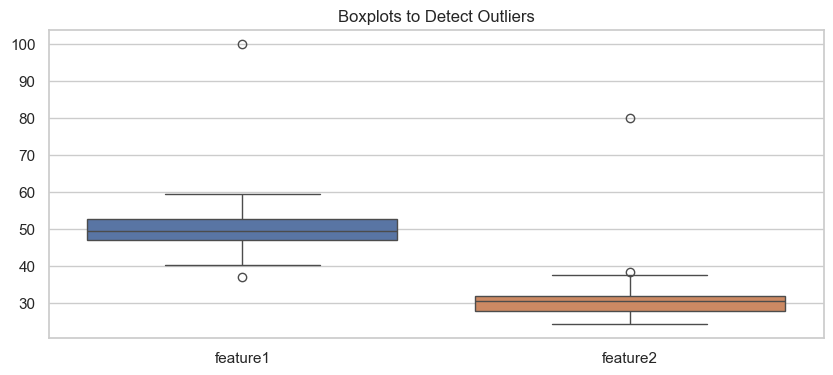

In [4]:
plt.figure(figsize=(10, 4))
sns.boxplot(data=df)
plt.title("Boxplots to Detect Outliers")
plt.show()

### 2. Detect Outliers Using IQR Method
The IQR method defines outliers as points that fall below Q1 - 1.5×IQR or above Q3 + 1.5×IQR.

In [5]:
def detect_outliers_iqr(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return (column < lower) | (column > upper)

df['outlier_iqr_f1'] = detect_outliers_iqr(df['feature1'])
df['outlier_iqr_f2'] = detect_outliers_iqr(df['feature2'])

df[df['outlier_iqr_f1'] | df['outlier_iqr_f2']]

,feature1,feature2,outlier_iqr_f1,outlier_iqr_f2
74,36.901274,30.830072,True,False
79,40.062155,38.160507,False,True
100,100.000000,80.000000,True,True


### 3. Detect Outliers Using Z-Score Method
Z-score measures how many standard deviations a value is from the mean.
Values above 3 (or below -3) are often considered outliers.

In [6]:
df['zscore_f1'] = np.abs(stats.zscore(df['feature1']))
df['zscore_f2'] = np.abs(stats.zscore(df['feature2']))

df[(df['zscore_f1'] > 3) | (df['zscore_f2'] > 3)]

,feature1,feature2,outlier_iqr_f1,outlier_iqr_f2,zscore_f1,zscore_f2
100,100.0,80.0,True,True,7.437417,8.676778


### 4. Detect Outliers Using Isolation Forest
Isolation Forest is an unsupervised machine learning model that detects anomalies by randomly isolating observations.

In [7]:
iso = IsolationForest(contamination=0.02, random_state=42)

df['outlier_iso'] = iso.fit_predict(df[['feature1', 'feature2']])
df[df['outlier_iso'] == -1]  # -1 means anomaly

,feature1,feature2,outlier_iqr_f1,outlier_iqr_f2,zscore_f1,zscore_f2,outlier_iso
79,40.062155,38.160507,False,True,1.474844,1.333705,-1
100,100.000000,80.000000,True,True,7.437417,8.676778,-1


### 5. Handle Outliers Using Winsorization
Winsorization caps outliers to the nearest limit within the IQR-based range.

In [8]:
def winsorize(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return np.clip(column, lower, upper)

df['feature1_winsor'] = winsorize(df['feature1'])
df['feature2_winsor'] = winsorize(df['feature2'])

#### Visualise Winsorised Data
Boxplots of winsorised features show reduced influence of outliers.

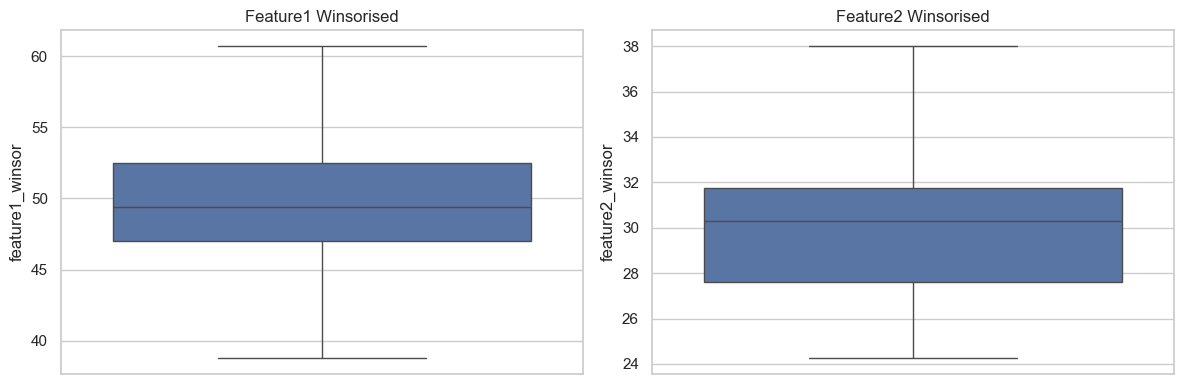

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.boxplot(y=df['feature1_winsor'], ax=axes[0]).set_title("Feature1 Winsorised")
sns.boxplot(y=df['feature2_winsor'], ax=axes[1]).set_title("Feature2 Winsorised")

plt.tight_layout()
plt.show()

### 10. Summary

This notebook introduced basic techniques for detecting and handling outliers.

Key points:

- Outliers can significantly distort statistical summaries and model performance.  
- IQR (Interquartile Range) and Z-score are simple and interpretable methods for identifying outliers.  
- Isolation Forest is a machine learning approach suitable for detecting anomalies in multivariate data.  
- Winsorization allows for capping extreme values instead of removing them, preserving the dataset's structure.  
- Choosing a handling method should be guided by the specific data context and domain knowledge.